In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("data/processed/peninsula.csv")
df

,MES,SISTEMA,TARIFA,CIA,FEE,P1.,P2.,P3.,P4.,P5,P6.
0,2022-01-01,PENINSULA,2.0TD,ACCIONA,Cierzo,0.335863,0.289650,0.269060,0.0,0.0,0.0
1,2022-01-01,PENINSULA,2.0TD,ACCIONA,Levante,0.355148,0.308935,0.288345,0.0,0.0,0.0
2,2022-01-01,PENINSULA,2.0TD,FACTOR,23.5,0.375089,0.309010,0.270009,0.0,0.0,0.0
3,2022-01-01,PENINSULA,2.0TD,FACTOR,25.5,0.377089,0.311010,0.272009,0.0,0.0,0.0
4,2022-01-01,PENINSULA,2.0TD,CANDELA,"02 / Bi0,03",0.420211,0.331553,0.293085,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1239,2023-11-01,PENINSULA,2.0TD,CANDELA,"05 / Bi0,018",0.220479,0.166307,0.116192,0.0,0.0,0.0
1240,2023-11-01,PENINSULA,2.0TD,CANDELA,"03 / Bi0,025",0.227479,0.173307,0.123192,0.0,0.0,0.0
1241,2023-11-01,PENINSULA,2.0TD,CANDELA,"04 / Bi0,02",0.222479,0.168307,0.118192,0.0,0.0,0.0
1242,2023-11-01,PENINSULA,2.0TD,CANDELA,"02 / Bi0,03",0.232479,0.178307,0.128192,0.0,0.0,0.0


In [5]:
df["CIA"].unique()

array(['ACCIONA', 'FACTOR', 'CANDELA', 'GANA', 'ELEIA', 'IGNIS', 'AEQ',
       'ADI', 'MAX'], dtype=object)

In [6]:
mapeo_cia = {'ACCIONA': 1, 'FACTOR': 2, 'CANDELA': 3, 'GANA': 4, 'ELEIA': 5, 'IGNIS': 6, 'AEQ': 7, 'ADI': 8, 'MAX': 9}
df['CIA_numerica'] = df['CIA'].map(mapeo_cia)

In [8]:
df

,MES,SISTEMA,TARIFA,CIA,FEE,P1.,P2.,P3.,P4.,P5,P6.,CIA_numerica
0,2022-01-01,PENINSULA,2.0TD,ACCIONA,Cierzo,0.335863,0.289650,0.269060,0.0,0.0,0.0,1
1,2022-01-01,PENINSULA,2.0TD,ACCIONA,Levante,0.355148,0.308935,0.288345,0.0,0.0,0.0,1
2,2022-01-01,PENINSULA,2.0TD,FACTOR,23.5,0.375089,0.309010,0.270009,0.0,0.0,0.0,2
3,2022-01-01,PENINSULA,2.0TD,FACTOR,25.5,0.377089,0.311010,0.272009,0.0,0.0,0.0,2
4,2022-01-01,PENINSULA,2.0TD,CANDELA,"02 / Bi0,03",0.420211,0.331553,0.293085,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1239,2023-11-01,PENINSULA,2.0TD,CANDELA,"05 / Bi0,018",0.220479,0.166307,0.116192,0.0,0.0,0.0,3
1240,2023-11-01,PENINSULA,2.0TD,CANDELA,"03 / Bi0,025",0.227479,0.173307,0.123192,0.0,0.0,0.0,3
1241,2023-11-01,PENINSULA,2.0TD,CANDELA,"04 / Bi0,02",0.222479,0.168307,0.118192,0.0,0.0,0.0,3
1242,2023-11-01,PENINSULA,2.0TD,CANDELA,"02 / Bi0,03",0.232479,0.178307,0.128192,0.0,0.0,0.0,3


In [18]:
mapeo_tarifa = {'2.0TD': 1}
df['MAP_CIA'] = df['TARIFA'].map(mapeo_tarifa)


In [21]:
valores_unicos = df['FEE'].unique()

# Creamos un diccionario de mapeo con el número del orden
mapeo_valores = {valor: indice+1 for indice, valor in enumerate(valores_unicos)}

# Aplicamos el mapeo a la columna 'NOMBRE_DE_LA_COLUMNA'
df['FEE_numerica'] = df['FEE'].map(mapeo_valores)


In [22]:
df

,MES,SISTEMA,TARIFA,CIA,FEE,P1.,P2.,P3.,P4.,P5,P6.,CIA_numerica,MAP_SISTEMA,MAP_CIA,FEE_numerica
0,2022-01-01,PENINSULA,2.0TD,ACCIONA,Cierzo,0.335863,0.289650,0.269060,0.0,0.0,0.0,1,1,1,1
1,2022-01-01,PENINSULA,2.0TD,ACCIONA,Levante,0.355148,0.308935,0.288345,0.0,0.0,0.0,1,1,1,2
2,2022-01-01,PENINSULA,2.0TD,FACTOR,23.5,0.375089,0.309010,0.270009,0.0,0.0,0.0,2,1,1,3
3,2022-01-01,PENINSULA,2.0TD,FACTOR,25.5,0.377089,0.311010,0.272009,0.0,0.0,0.0,2,1,1,4
4,2022-01-01,PENINSULA,2.0TD,CANDELA,"02 / Bi0,03",0.420211,0.331553,0.293085,0.0,0.0,0.0,3,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,2023-11-01,PENINSULA,2.0TD,CANDELA,"05 / Bi0,018",0.220479,0.166307,0.116192,0.0,0.0,0.0,3,1,1,19
1240,2023-11-01,PENINSULA,2.0TD,CANDELA,"03 / Bi0,025",0.227479,0.173307,0.123192,0.0,0.0,0.0,3,1,1,21
1241,2023-11-01,PENINSULA,2.0TD,CANDELA,"04 / Bi0,02",0.222479,0.168307,0.118192,0.0,0.0,0.0,3,1,1,20
1242,2023-11-01,PENINSULA,2.0TD,CANDELA,"02 / Bi0,03",0.232479,0.178307,0.128192,0.0,0.0,0.0,3,1,1,5


In [25]:
import seaborn as sns

<Axes: >

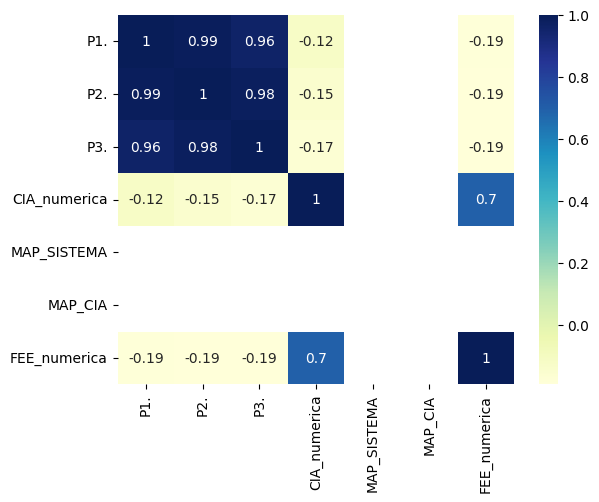

In [28]:
sns.heatmap(df.corr(numeric_only=True),cmap='YlGnBu',annot=True)

In [23]:
columnas_a_eliminar = ['P4.', 'P5', 'P6.']
df = df.drop(columnas_a_eliminar, axis=1)


In [29]:
columnas_x= ['P1.', 'P2.', 'P3.',"CIA_numerica"]
df[columnas_x]

,P1.,P2.,P3.,CIA_numerica
0,0.335863,0.289650,0.269060,1
1,0.355148,0.308935,0.288345,1
2,0.375089,0.309010,0.270009,2
3,0.377089,0.311010,0.272009,2
4,0.420211,0.331553,0.293085,3
...,...,...,...,...
1239,0.220479,0.166307,0.116192,3
1240,0.227479,0.173307,0.123192,3
1241,0.222479,0.168307,0.118192,3
1242,0.232479,0.178307,0.128192,3


In [32]:
# Supongamos que tu DataFrame se llama df
# X serían las características, y sería el objetivo (en este caso, el FEE)
X = df[columnas_x]
y = df['FEE_numerica']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definición del preprocesamiento y modelo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['P1.', 'P2.', 'P3.']),
        # Puedes agregar más transformadores según tus necesidades
    ])

model = RandomForestRegressor()

# Creación del pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Opcional: escala los datos
    ('model', model),
])

# Entrenamiento y validación del modelo
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluación del rendimiento
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optimización de hiperparámetros (opcional)
param_grid = {
    'model__n_estimators': [10, 50, 100],
    'model__max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')


Mean Squared Error: 338.26250147992823
Best Hyperparameters: {'model__max_depth': 10, 'model__n_estimators': 100}


In [33]:
df["CIA"].unique()

array(['ACCIONA', 'FACTOR', 'CANDELA', 'GANA', 'ELEIA', 'IGNIS', 'AEQ',
       'ADI', 'MAX'], dtype=object)

In [34]:
df

,MES,SISTEMA,TARIFA,CIA,FEE,P1.,P2.,P3.,CIA_numerica,MAP_SISTEMA,MAP_CIA,FEE_numerica
0,2022-01-01,PENINSULA,2.0TD,ACCIONA,Cierzo,0.335863,0.289650,0.269060,1,1,1,1
1,2022-01-01,PENINSULA,2.0TD,ACCIONA,Levante,0.355148,0.308935,0.288345,1,1,1,2
2,2022-01-01,PENINSULA,2.0TD,FACTOR,23.5,0.375089,0.309010,0.270009,2,1,1,3
3,2022-01-01,PENINSULA,2.0TD,FACTOR,25.5,0.377089,0.311010,0.272009,2,1,1,4
4,2022-01-01,PENINSULA,2.0TD,CANDELA,"02 / Bi0,03",0.420211,0.331553,0.293085,3,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1239,2023-11-01,PENINSULA,2.0TD,CANDELA,"05 / Bi0,018",0.220479,0.166307,0.116192,3,1,1,19
1240,2023-11-01,PENINSULA,2.0TD,CANDELA,"03 / Bi0,025",0.227479,0.173307,0.123192,3,1,1,21
1241,2023-11-01,PENINSULA,2.0TD,CANDELA,"04 / Bi0,02",0.222479,0.168307,0.118192,3,1,1,20
1242,2023-11-01,PENINSULA,2.0TD,CANDELA,"02 / Bi0,03",0.232479,0.178307,0.128192,3,1,1,5


In [36]:
df["FEE_numerica"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])

In [39]:
# Predicciones en nuevas propuestas
nuevas_propuestas = pd.DataFrame({
    "CIA_numerica": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'FEE_numerica': [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], 
    'P1.': [0.1, 0.2, 0.3],  
    'P2.': [0.2, 0.3, 0.4],  
    'P3.': [0.3, 0.4, 0.5],
                                } ) 
nuevas_predicciones = pipeline.predict(nuevas_propuestas)
print(f'Predictions for new proposals: {nuevas_predicciones}')

ValueError: All arrays must be of the same length

In [41]:
df

,MES,SISTEMA,TARIFA,CIA,FEE,P1.,P2.,P3.,CIA_numerica,MAP_SISTEMA,MAP_CIA,FEE_numerica
0,2022-01-01,PENINSULA,2.0TD,ACCIONA,Cierzo,0.335863,0.289650,0.269060,1,1,1,1
1,2022-01-01,PENINSULA,2.0TD,ACCIONA,Levante,0.355148,0.308935,0.288345,1,1,1,2
2,2022-01-01,PENINSULA,2.0TD,FACTOR,23.5,0.375089,0.309010,0.270009,2,1,1,3
3,2022-01-01,PENINSULA,2.0TD,FACTOR,25.5,0.377089,0.311010,0.272009,2,1,1,4
4,2022-01-01,PENINSULA,2.0TD,CANDELA,"02 / Bi0,03",0.420211,0.331553,0.293085,3,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1239,2023-11-01,PENINSULA,2.0TD,CANDELA,"05 / Bi0,018",0.220479,0.166307,0.116192,3,1,1,19
1240,2023-11-01,PENINSULA,2.0TD,CANDELA,"03 / Bi0,025",0.227479,0.173307,0.123192,3,1,1,21
1241,2023-11-01,PENINSULA,2.0TD,CANDELA,"04 / Bi0,02",0.222479,0.168307,0.118192,3,1,1,20
1242,2023-11-01,PENINSULA,2.0TD,CANDELA,"02 / Bi0,03",0.232479,0.178307,0.128192,3,1,1,5


In [43]:
nuevas_propuestas = pd.DataFrame({
    'CIA_numerica': [1, 2, 3],
    'P1.': [0.335863, 0.2, 0.3],
    'P2.': [0.28965, 0.3, 0.4],
    'P3.': [0.269060, 0.4, 0.5],
})

nuevas_predicciones = pipeline.predict(nuevas_propuestas)
print(f'Predictions for new proposals: {nuevas_predicciones}')

Predictions for new proposals: [16.80183333 26.75507143 20.70940476]


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [52]:
df

,MES,SISTEMA,TARIFA,CIA,FEE,P1.,P2.,P3.,CIA_numerica,MAP_SISTEMA,MAP_CIA,FEE_numerica
0,2022-01-01,PENINSULA,2.0TD,ACCIONA,Cierzo,0.335863,0.289650,0.269060,1,1,1,1
1,2022-01-01,PENINSULA,2.0TD,ACCIONA,Levante,0.355148,0.308935,0.288345,1,1,1,2
2,2022-01-01,PENINSULA,2.0TD,FACTOR,23.5,0.375089,0.309010,0.270009,2,1,1,3
3,2022-01-01,PENINSULA,2.0TD,FACTOR,25.5,0.377089,0.311010,0.272009,2,1,1,4
4,2022-01-01,PENINSULA,2.0TD,CANDELA,"02 / Bi0,03",0.420211,0.331553,0.293085,3,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1239,2023-11-01,PENINSULA,2.0TD,CANDELA,"05 / Bi0,018",0.220479,0.166307,0.116192,3,1,1,19
1240,2023-11-01,PENINSULA,2.0TD,CANDELA,"03 / Bi0,025",0.227479,0.173307,0.123192,3,1,1,21
1241,2023-11-01,PENINSULA,2.0TD,CANDELA,"04 / Bi0,02",0.222479,0.168307,0.118192,3,1,1,20
1242,2023-11-01,PENINSULA,2.0TD,CANDELA,"02 / Bi0,03",0.232479,0.178307,0.128192,3,1,1,5


In [65]:
X = df[['P1.','P2.','P3.']]
y = df['FEE']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalar las características
    ('classifier', RandomForestClassifier())  # Utilizar 
       ])

In [68]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [69]:
y_pred = pipeline.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Exactitud del modelo: {accuracy}')
print('Informe de clasificación:\n', report)

Exactitud del modelo: 0.0642570281124498
Informe de clasificación:
                   precision    recall  f1-score   support

  10 MARE ZEN 2        0.00      0.00      0.00         4
  15 MARE ZEN 1        0.00      0.00      0.00         4
 20 MARE PLUS 3        0.00      0.00      0.00         3
 25 MARE PLUS 2        0.00      0.00      0.00         2
 30 MARE PLUS 1        0.00      0.00      0.00         6
   4 MARE KIT 2        0.00      0.00      0.00         2
   6 MARE KIT 1        0.00      0.00      0.00         2
   8 MARE ZEN 3        0.00      0.00      0.00         4
               -       1.00      1.00      1.00         2
              -
       0.50      0.50      0.50         2
    01 / Bi0,035       0.00      0.00      0.00         8
     02 / Bi0,03       0.00      0.00      0.00         4
    03 / Bi0,025       0.17      0.14      0.15         7
     04 / Bi0,02       0.00      0.00      0.00         5
    05 / Bi0,018       0.00      0.00      0.00         5
   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [71]:
df = pd.read_csv("data/processed/fixed_price.csv")
df

,SISTEMA,CIA,PRODUCTO,PRODUCTO_CIA,TARIFA,FEE,P1,P2,P3,P4,P5,P6,P1.,P2.,P3.,P4.,P5.,P6.
0,PENINSULA,ACCIONA,FIJO,CIERZO,2.0TD,-,0.088121,0.019570,0.000000,0.000000,0.000000,0.000000,0.355703,0.304626,0.265992,0,0,0
1,PENINSULA,ACCIONA,FIJO,LEVANTE,2.0TD,-,0.071682,0.003132,0.000000,0.000000,0.000000,0.000000,0.366868,0.315791,0.277157,0,0,0
2,PENINSULA,ACCIONA,FIJO,LEVANTE+,2.0TD,-,0.082641,0.014091,0.000000,0.000000,0.000000,0.000000,0.366868,0.315791,0.277157,0,0,0
3,PENINSULA,ACCIONA,FIJO,PONIENTE,2.0TD,-,0.071682,0.003132,0.000000,0.000000,0.000000,0.000000,0.360778,0.309701,0.271067,0,0,0
4,PENINSULA,ACCIONA,FIJO,PONIENTE+,2.0TD,-,0.077162,0.008611,0.000000,0.000000,0.000000,0.000000,0.360778,0.309701,0.271067,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,PENINSULA,ADI,FIJO,ECO ADI,6.1TD,-,0.071138,0.062579,0.036514,0.031673,0.013448,0.011367,0.223107,0.205496,0.185999,0.169934,0.167387,0.166234
903,PENINSULA,ADI,FIJO,RESIDENCIAL ESPECIAL,2.0TD,-,0.135186,0.135186,0.000000,0.000000,0.000000,0.000000,0.165071,0.165071,0.165071,0,0,0
904,PENINSULA,ADI,FIJO,ADI SENCILLA,2.0TD,-,0.075022,0.028336,0.000000,0.000000,0.000000,0.000000,0.253546,0.202874,0.17825,0,0,0
905,PENINSULA,ADI,FIJO,ADI SENCILLA,3.0TD,-,0.038308,0.032600,0.010965,0.010011,0.007487,0.005483,0.239604,0.218459,0.19183,0.171813,0.168778,0.167685


In [75]:
df["PRODUCTO_CIA"].unique()

array(['CIERZO', 'LEVANTE', 'LEVANTE+', 'PONIENTE', 'PONIENTE+',
       'TRAMONTANA', 'TRAMONTANA+', 'ARMONIA', 'EQUILIBRIO', 'SIMETRIA',
       'BALANCE OF ENERGY 0', 'BALANCE OF ENERGY 1',
       'BALANCE OF ENERGY 2', 'BALANCE OF ENERGY 3', 'SIMPLEX',
       'TU DECIDES 0', 'TU DECIDES 1', 'TU DECIDES 2', 'TU DECIDES 3',
       'TU ELIGES 0', 'TU ELIGES 1', 'TU ELIGES 2', 'TU ELIGES 3',
       'TU MEDIOAMBIENTE 0', 'TU MEDIOAMBIENTE 1', 'TU MEDIOAMBIENTE 2',
       'TU MEDIOAMBIENTE 3', 'OPEN(<15) PLANA', 'TEMPO 24H',
       'TEMPO 24H CCPP', 'TEMPO 3 PERIODOS', 'TEMPO LIBRE',
       'OPEN(<15<30) PLANA', 'OPEN(<30<50) PLANA', 'OPEN(<50<100) PLANA',
       'OPEN(>100) PLANA', 'EXCELLENT+ 1P', 'EXCELLENT+ 3P', 'EXCELLENT+',
       'GOLD', 'SILVER', 'DOMESTICO_EXTRA1P', 'DOMESTICO_EXTRA3P',
       'DOMESTICO_MINI', 'DOMESTICO_Precio WEB3P', 'DOMESTICO_PRIME',
       'NEGOCIO_AHORRO', 'NEGOCIO_AHORRO1P', 'NEGOCIO_EXTRA',
       'NEGOCIO_EXTRA1P', 'NEGOCIO_EXTRAPLUS', 'NEGOCIO_EXTRAPLUS

In [ ]:
nuevas_caracteristicas = pd.DataFrame({
    'CIA_numerica': [nuevo_valor_1],
    'MAP_SISTEMA': [nuevo_valor_2],
    'MAP_CIA': [nuevo_valor_3],
    'FEE_numerica': [nuevo_valor_4]
})

nueva_prediccion = pipeline.predict(nuevas_caracteristicas)
print('Predicción para nuevos valores:', nueva_prediccion)